# Processing Results for Battery RUL Data

Make sure to use same version of pandas as on the Raspberry Pi

In [193]:
!zip -r Plots.zip Plots

  adding: Plots/ (stored 0%)
  adding: Plots/Comparison_OSP.eps (deflated 78%)
  adding: Plots/Comparison_MSP.eps (deflated 78%)
  adding: Plots/Accuracy_OSP.eps (deflated 74%)
  adding: Plots/Edge_MSP.eps (deflated 70%)
  adding: Plots/Edge_OSP.eps (deflated 71%)
  adding: Plots/Accuracy_MSP.eps (deflated 73%)


In [1]:
!pip install pandas==1.5.2
!mkdir Plots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 37.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


## Mount Google Drive

In [2]:
# import google drive
from google.colab import drive

# mount drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load .pkl files from Drive

In [82]:
model_list=['DeTr','ELM']
model_name=['Transformer','ELM']
dataset_list=['NASA','CALCE']
kind_list=['OSP','MSP']

Alternatively, upload the .pkl files directly to /content/ 
Change paths as needed

In [83]:
import shutil

dest = '/content/pkl/'
drive_src = '/content/drive/MyDrive/CoE ECE 198/Results'

for model, name in zip(model_list, model_name):
  for dataset in dataset_list:
    for kind in kind_list:
      src = f"{drive_src}/Results_{model}_{dataset}/"
      filename = f"{kind}_{name}_{dataset}.pkl"
      print(f"Copying {src+filename} to {dest}")                       
      shutil.copy(src+filename,dest)  

shutil.copy(f'{drive_src}/Results_LSTM_NASA/MSP_LSTM_NASA.pkl',dest)
shutil.copy(f'{drive_src}/Results_LSTM_CALCE/MSP_LSTM_CALCE.pkl',dest)
shutil.copy(f'{drive_src}/Results_RNN_NASA/OSP_RNN_NASA.pkl',dest)
shutil.copy(f'{drive_src}/Results_RNN_CALCE/OSP_RNN_CALCE.pkl',dest)

Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_NASA/OSP_Transformer_NASA.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_NASA/MSP_Transformer_NASA.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_CALCE/OSP_Transformer_CALCE.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_DeTr_CALCE/MSP_Transformer_CALCE.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_NASA/OSP_ELM_NASA.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_NASA/MSP_ELM_NASA.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_CALCE/OSP_ELM_CALCE.pkl to /content/pkl/
Copying /content/drive/MyDrive/CoE ECE 198/Results/Results_ELM_CALCE/MSP_ELM_CALCE.pkl to /content/pkl/


'/content/pkl/OSP_RNN_CALCE.pkl'

## Load pickles

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
OSP, MSP = {}, {}

for name in model_name:
  OSP[name] = {}
  MSP[name] = {}

  for dataset in dataset_list:
    OSP[name][dataset] = pd.read_pickle(f"OSP_{name}_{dataset}.pkl") 
    MSP[name][dataset] = pd.read_pickle(f"MSP_{name}_{dataset}.pkl") 

MSP['LSTM'] = {}
MSP['LSTM']['NASA'] = pd.read_pickle(f"MSP_LSTM_NASA.pkl")
MSP['LSTM']['CALCE'] = pd.read_pickle(f"MSP_LSTM_CALCE.pkl")

OSP['RNN']={}
OSP['RNN']['NASA'] = pd.read_pickle(f"OSP_RNN_NASA.pkl")


## Denoising Transformer Results

###One-step ahead

In [146]:
OSP['Transformer']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,8450.479492,0.282198,99.539817,0.006240,0.000100,-1,-0.090909
1,B0006,8437.343750,0.272448,99.350667,0.008337,0.000132,-2,-0.666667
2,B0007,8436.526367,0.272167,99.679161,0.004705,0.000066,1,0.017857
3,B0018,8435.417969,0.208469,99.212587,0.010890,0.000472,0,0.000000


In [147]:
OSP['Transformer']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,23065.695312,3.457784,98.215625,0.008735,0.000260,-1,-0.011765
1,CS2_36,23056.114258,2.580896,97.937548,0.009165,0.000141,5,0.086207
2,CS2_37,23054.416992,2.725054,98.560477,0.007598,0.000125,-1,-0.009346
3,CS2_38,23053.434570,2.740050,98.498744,0.008206,0.000171,-14,-0.114754


Compute average performance

In [188]:
OSP_Transformer_NASA = {
    "model_name": "Transformer",

    "mem_usage" : OSP['Transformer']['NASA']['mem_usage'].mean(),
    "mem_usage_p025" : OSP['Transformer']['NASA']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : OSP['Transformer']['NASA']['mem_usage'].quantile(0.975),

    "exec_time" : OSP['Transformer']['NASA']['exec_time'].mean(),
    "exec_time_p025" : OSP['Transformer']['NASA']['exec_time'].quantile(0.025),
    "exec_time_p975" : OSP['Transformer']['NASA']['exec_time'].quantile(0.975),

    "acc"      : OSP['Transformer']['NASA']['acc'].mean(),
    "acc_p025" : OSP['Transformer']['NASA']['acc'].quantile(0.025),
    "acc_p975" : OSP['Transformer']['NASA']['acc'].quantile(0.975),

    "mae"       : OSP['Transformer']['NASA']['mae'].mean(),
    "mae_p025"  : OSP['Transformer']['NASA']['mae'].quantile(0.025),
    "mae_p975"  : OSP['Transformer']['NASA']['mae'].quantile(0.975),
    "mae_ci"   : OSP['Transformer']['NASA']['mae'].std(),

    "rmse"      : OSP['Transformer']['NASA']['rmse'].mean(),
    "rmse_p025"  : OSP['Transformer']['NASA']['rmse'].quantile(0.025),
    "rmse_p975"  : OSP['Transformer']['NASA']['rmse'].quantile(0.975),
    "rmse_ci"   : OSP['Transformer']['NASA']['rmse'].std(),

    "rul_error" : OSP['Transformer']['NASA']['rul_error'].abs().mean(),
    "rul_error_p025" : OSP['Transformer']['NASA']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : OSP['Transformer']['NASA']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : OSP['Transformer']['NASA']['RUL_relative_error'].abs().mean(),
}
detr_nasa_rmse_std = OSP['Transformer']['NASA']['rmse'].std()
detr_nasa_mae_std = OSP['Transformer']['NASA']['mae'].std()

OSP_Transformer_CALCE = {
    "model_name": "Transformer",

    "mem_usage" : OSP['Transformer']['CALCE']['mem_usage'].mean(),
    "mem_usage_p025" : OSP['Transformer']['CALCE']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : OSP['Transformer']['CALCE']['mem_usage'].quantile(0.975),

    "exec_time" : OSP['Transformer']['CALCE']['exec_time'].mean(),
    "exec_time_p025" : OSP['Transformer']['CALCE']['exec_time'].quantile(0.025),
    "exec_time_p975" : OSP['Transformer']['CALCE']['exec_time'].quantile(0.975),

    "acc"       : OSP['Transformer']['CALCE']['acc'].mean(),
    "acc_p025" : OSP['Transformer']['CALCE']['acc'].quantile(0.025),
    "acc_p975" : OSP['Transformer']['CALCE']['acc'].quantile(0.975),
    
    "mae"       : OSP['Transformer']['CALCE']['mae'].mean(),
    "mae_p025"  : OSP['Transformer']['CALCE']['mae'].quantile(0.025),
    "mae_p975"  : OSP['Transformer']['CALCE']['mae'].quantile(0.975),
    "mae_ci"   : OSP['Transformer']['CALCE']['mae'].std(),

    "rmse"      : OSP['Transformer']['CALCE']['rmse'].mean(),
    "rmse_p025"  : OSP['Transformer']['CALCE']['rmse'].quantile(0.025),
    "rmse_p975"  : OSP['Transformer']['CALCE']['rmse'].quantile(0.975),
    "rmse_ci"   : OSP['Transformer']['CALCE']['rmse'].std(),

    "rul_error" : OSP['Transformer']['CALCE']['rul_error'].abs().mean(),
    "rul_error_p025" : OSP['Transformer']['CALCE']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : OSP['Transformer']['CALCE']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : OSP['Transformer']['CALCE']['RUL_relative_error'].abs().mean(),
}


###Multi-step ahead

In [149]:
MSP['Transformer']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,8443.964844,0.469983,97.469385,0.035052,0.037384,-16,-0.592593
1,B0006,8437.690430,0.449481,95.972753,0.051759,0.056422,-16,-0.842105
2,B0007,8435.503906,0.431577,98.995688,0.014755,0.019104,9,0.125000
3,B0018,8435.463867,0.376771,97.989850,0.028377,0.031970,-10,-0.416667


In [150]:
MSP['Transformer']['CALCE']['acc'] = MSP['Transformer']['CALCE']['acc'] * 100
MSP['Transformer']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,23044.916016,2.927549,86.163628,0.064958,0.087489,-50,-0.335570
1,CS2_36,23045.955078,3.115000,90.745314,0.045209,0.056550,19,0.155738
2,CS2_37,23042.001953,3.822152,95.955591,0.019446,0.025919,-10,-0.058480
3,CS2_38,23041.798828,3.297731,95.391737,0.025616,0.031497,6,0.032258


Compute average performance

In [151]:
MSP_Transformer_NASA = {
    "model_name": "Transformer",

    "mem_usage" : MSP['Transformer']['NASA']['mem_usage'].mean(),
    "mem_usage_p025" : MSP['Transformer']['NASA']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : MSP['Transformer']['NASA']['mem_usage'].quantile(0.975),

    "exec_time" : MSP['Transformer']['NASA']['exec_time'].mean(),
    "exec_time_p025" : MSP['Transformer']['NASA']['exec_time'].quantile(0.025),
    "exec_time_p975" : MSP['Transformer']['NASA']['exec_time'].quantile(0.975),

    "acc"      : MSP['Transformer']['NASA']['acc'].mean(),
    "acc_p025" : MSP['Transformer']['NASA']['acc'].quantile(0.025),
    "acc_p975" : MSP['Transformer']['NASA']['acc'].quantile(0.975),

    "mae"       : MSP['Transformer']['NASA']['mae'].mean(),
    "mae_p025"  : MSP['Transformer']['NASA']['mae'].quantile(0.025),
    "mae_p975"  : MSP['Transformer']['NASA']['mae'].quantile(0.975),

    "rmse"      : MSP['Transformer']['NASA']['rmse'].mean(),
    "rmse_p025"  : MSP['Transformer']['NASA']['rmse'].quantile(0.025),
    "rmse_p975"  : MSP['Transformer']['NASA']['rmse'].quantile(0.975),

    "rul_error" : MSP['Transformer']['NASA']['rul_error'].abs().mean(),
    "rul_error_p025" : MSP['Transformer']['NASA']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : MSP['Transformer']['NASA']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : MSP['Transformer']['NASA']['RUL_relative_error'].abs().mean(),
}

MSP_Transformer_CALCE = {
    "model_name": "Transformer",

    "mem_usage" : MSP['Transformer']['CALCE']['mem_usage'].mean(),
    "mem_usage_p025" : MSP['Transformer']['CALCE']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : MSP['Transformer']['CALCE']['mem_usage'].quantile(0.975),

    "exec_time" : MSP['Transformer']['CALCE']['exec_time'].mean(),
    "exec_time_p025" : MSP['Transformer']['CALCE']['exec_time'].quantile(0.025),
    "exec_time_p975" : MSP['Transformer']['CALCE']['exec_time'].quantile(0.975),

    "acc"      : MSP['Transformer']['CALCE']['acc'].mean(),
    "acc_p025" : MSP['Transformer']['CALCE']['acc'].quantile(0.025),
    "acc_p975" : MSP['Transformer']['CALCE']['acc'].quantile(0.975),

    "mae"       : MSP['Transformer']['CALCE']['mae'].mean(),
    "mae_p025"  : MSP['Transformer']['CALCE']['mae'].quantile(0.025),
    "mae_p975"  : MSP['Transformer']['CALCE']['mae'].quantile(0.975),

    "rmse"      : MSP['Transformer']['CALCE']['rmse'].mean(),
    "rmse_p025"  : MSP['Transformer']['CALCE']['rmse'].quantile(0.025),
    "rmse_p975"  : MSP['Transformer']['CALCE']['rmse'].quantile(0.975),

    "rul_error" : MSP['Transformer']['CALCE']['rul_error'].abs().mean(),
    "rul_error_p025" : MSP['Transformer']['CALCE']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : MSP['Transformer']['CALCE']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : MSP['Transformer']['CALCE']['RUL_relative_error'].abs().mean()
}

## Extreme Learning Machine (ELM) Results

###One-step ahead

In [152]:
OSP['ELM']['NASA']['acc'] = OSP['ELM']['NASA']['acc'] * 100
OSP['ELM']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,28645.042969,0.336447,99.465567,0.007244,0.000104,-1,0.090909
1,B0006,28641.761719,0.046279,98.618238,0.017635,0.000469,-2,0.666667
2,B0007,28641.761719,0.046761,99.695510,0.004448,0.000064,2,0.035714
3,B0018,28640.613281,0.035380,98.965815,0.014263,0.000587,-1,0.125000


In [153]:
OSP['ELM']['CALCE']['acc'] = OSP['ELM']['CALCE']['acc'] * 100
OSP['ELM']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,43368.362305,1.038193,98.203060,0.008414,0.000282,-1,0.011765
1,CS2_36,43363.984375,0.784657,97.978561,0.008529,0.000136,7,0.120690
2,CS2_37,43364.617188,0.947196,98.678850,0.006704,0.000113,-1,0.009346
3,CS2_38,43364.791992,0.892711,98.742260,0.006957,0.000174,-1,0.008197


Compute average performance

In [154]:
OSP_ELM_NASA = {
    "model_name": "ELM",

    "mem_usage" : OSP['ELM']['NASA']['mem_usage'].mean(),
    "mem_usage_p025" : OSP['ELM']['NASA']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : OSP['ELM']['NASA']['mem_usage'].quantile(0.975),

    "exec_time" : OSP['ELM']['NASA']['exec_time'].mean(),
    "exec_time_p025" : OSP['ELM']['NASA']['exec_time'].quantile(0.025),
    "exec_time_p975" : OSP['ELM']['NASA']['exec_time'].quantile(0.975),

    "acc"      : OSP['ELM']['NASA']['acc'].mean(),
    "acc_p025" : OSP['ELM']['NASA']['acc'].quantile(0.025),
    "acc_p975" : OSP['ELM']['NASA']['acc'].quantile(0.975),

    "mae"       : OSP['ELM']['NASA']['mae'].mean(),
    "mae_p025"  : OSP['ELM']['NASA']['mae'].quantile(0.025),
    "mae_p975"  : OSP['ELM']['NASA']['mae'].quantile(0.975),
    "mae_ci"   : OSP['ELM']['NASA']['mae'].std(),

    "rmse"      : OSP['ELM']['NASA']['rmse'].mean(),
    "rmse_p025"  : OSP['ELM']['NASA']['rmse'].quantile(0.025),
    "rmse_p975"  : OSP['ELM']['NASA']['rmse'].quantile(0.975),
    "rmse_ci"   : OSP['ELM']['NASA']['rmse'].std(),

    "rul_error" : OSP['ELM']['NASA']['rul_error'].abs().mean(),
    "rul_error_p025" : OSP['ELM']['NASA']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : OSP['ELM']['NASA']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : OSP['ELM']['NASA']['RUL_relative_error'].abs().mean(),
}

OSP_ELM_CALCE = {
    "model_name": "ELM",

    "mem_usage" : OSP['ELM']['CALCE']['mem_usage'].mean(),
    "mem_usage_p025" : OSP['ELM']['CALCE']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : OSP['ELM']['CALCE']['mem_usage'].quantile(0.975),

    "exec_time" : OSP['ELM']['CALCE']['exec_time'].mean(),
    "exec_time_p025" : OSP['ELM']['CALCE']['exec_time'].quantile(0.025),
    "exec_time_p975" : OSP['ELM']['CALCE']['exec_time'].quantile(0.975),

    "acc"      : OSP['ELM']['CALCE']['acc'].mean(),
    "acc_p025" : OSP['ELM']['CALCE']['acc'].quantile(0.025),
    "acc_p975" : OSP['ELM']['CALCE']['acc'].quantile(0.975),

    "mae"       : OSP['ELM']['CALCE']['mae'].mean(),
    "mae_p025"  : OSP['ELM']['CALCE']['mae'].quantile(0.025),
    "mae_p975"  : OSP['ELM']['CALCE']['mae'].quantile(0.975),
    "mae_ci"   : OSP['ELM']['CALCE']['mae'].std(),

    "rmse"      : OSP['ELM']['CALCE']['rmse'].mean(),
    "rmse_p025"  : OSP['ELM']['CALCE']['rmse'].quantile(0.025),
    "rmse_p975"  : OSP['ELM']['CALCE']['rmse'].quantile(0.975),
    "rmse_ci"   : OSP['ELM']['CALCE']['rmse'].std(),

    "rul_error" : OSP['ELM']['CALCE']['rul_error'].abs().mean(),
    "rul_error_p025" : OSP['ELM']['CALCE']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : OSP['ELM']['CALCE']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : OSP['ELM']['CALCE']['RUL_relative_error'].abs().mean(),
}

###Multi-step ahead

In [155]:
MSP['ELM']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,28639.676758,0.036425,97.081542,0.039317,0.043396,-16,-0.941176
1,B0006,28639.676758,0.043902,95.049081,0.061785,0.075344,-6,-0.666667
2,B0007,28639.676758,0.041260,97.665443,0.034083,0.038580,18,0.290323
3,B0018,28639.254883,0.030310,98.466373,0.021560,0.026480,-5,-0.333333


In [156]:
MSP['ELM']['CALCE']['acc'] = MSP['ELM']['CALCE']['acc'] * 100
MSP['ELM']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,43348.937500,0.836184,93.150112,0.031570,0.047011,-15,-0.135135
1,CS2_36,43349.429688,0.880160,86.286938,0.064123,0.071877,31,0.373494
2,CS2_37,43349.781250,0.925396,91.275721,0.045481,0.055052,16,0.120301
3,CS2_38,43349.992188,0.946703,87.085914,0.066536,0.077494,31,0.210884


Compute Average Performance

In [157]:
MSP_ELM_NASA = {
    "model_name": "ELM",

    "mem_usage" : MSP['ELM']['NASA']['mem_usage'].mean(),
    "mem_usage_p025" : MSP['ELM']['NASA']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : MSP['ELM']['NASA']['mem_usage'].quantile(0.975),

    "exec_time" : MSP['ELM']['NASA']['exec_time'].mean(),
    "exec_time_p025" : MSP['ELM']['NASA']['exec_time'].quantile(0.025),
    "exec_time_p975" : MSP['ELM']['NASA']['exec_time'].quantile(0.975),

    "acc"      : MSP['ELM']['NASA']['acc'].mean(),
    "acc_p025" : MSP['ELM']['NASA']['acc'].quantile(0.025),
    "acc_p975" : MSP['ELM']['NASA']['acc'].quantile(0.975),

    "mae"       : MSP['ELM']['NASA']['mae'].mean(),
    "mae_p025"  : MSP['ELM']['NASA']['mae'].quantile(0.025),
    "mae_p975"  : MSP['ELM']['NASA']['mae'].quantile(0.975),

    "rmse"      : MSP['ELM']['NASA']['rmse'].mean(),
    "rmse_p025"  : MSP['ELM']['NASA']['rmse'].quantile(0.025),
    "rmse_p975"  : MSP['ELM']['NASA']['rmse'].quantile(0.975),

    "rul_error" : MSP['ELM']['NASA']['rul_error'].abs().mean(),
    "rul_error_p025" : MSP['ELM']['NASA']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : MSP['ELM']['NASA']['rul_error'].abs().quantile(0.975),
}

MSP_ELM_CALCE = {
    "model_name": "ELM",

    "mem_usage" : MSP['ELM']['CALCE']['mem_usage'].mean(),
    "mem_usage_p025" : MSP['ELM']['CALCE']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : MSP['ELM']['CALCE']['mem_usage'].quantile(0.975),

    "exec_time" : MSP['ELM']['CALCE']['exec_time'].mean(),
    "exec_time_p025" : MSP['ELM']['CALCE']['exec_time'].quantile(0.025),
    "exec_time_p975" : MSP['ELM']['CALCE']['exec_time'].quantile(0.975),

    "acc"      : MSP['ELM']['CALCE']['acc'].mean(),
    "acc_p025" : MSP['ELM']['CALCE']['acc'].quantile(0.025),
    "acc_p975" : MSP['ELM']['CALCE']['acc'].quantile(0.975),

    "mae"       : MSP['ELM']['CALCE']['mae'].mean(),
    "mae_p025"  : MSP['ELM']['CALCE']['mae'].quantile(0.025),
    "mae_p975"  : MSP['ELM']['CALCE']['mae'].quantile(0.975),

    "rmse"      : MSP['ELM']['CALCE']['rmse'].mean(),
    "rmse_p025"  : MSP['ELM']['CALCE']['rmse'].quantile(0.025),
    "rmse_p975"  : MSP['ELM']['CALCE']['rmse'].quantile(0.975),

    "rul_error" : MSP['ELM']['CALCE']['rul_error'].abs().mean(),
    "rul_error_p025" : MSP['ELM']['CALCE']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : MSP['ELM']['CALCE']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : MSP['ELM']['CALCE']['RUL_relative_error'].abs().mean(),
}

## Recurrent Neural Network (RNN) Results

### One-Step Ahead

In [158]:
OSP['RNN']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,49728.824219,0.206502,99.239930,0.012138,0.015530,-1,0.010309
1,B0006,49632.081055,0.215049,99.176172,0.012854,0.023744,1,-0.013514
2,B0007,49631.653320,0.215147,99.200841,0.013239,0.017369,-2,0.016129
3,B0018,49630.869141,0.180558,97.311990,0.040910,0.046112,-4,0.055556


In [159]:
OSP['RNN']['CALCE'] = pd.read_pickle(f"OSP_RNN_CALCE.pkl")
OSP['RNN']['CALCE']['acc'] = OSP['RNN']['CALCE']['acc']*100
OSP['RNN']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,49724.568359,0.942009,99.100878,0.006010,0.011928,1,-0.001565
1,CS2_36,49627.830078,0.991555,98.754700,0.007137,0.014784,-1,0.001553
2,CS2_37,49625.602539,1.023273,99.132647,0.006008,0.013171,3,-0.004196
3,CS2_38,49625.602539,1.048902,99.187791,0.006123,0.013458,-5,0.006649


Compute average performance

In [184]:
OSP_RNN_NASA = {
    "model_name": "RNN",

    "mem_usage" : OSP['RNN']['NASA']['mem_usage'].mean(),
    "mem_usage_p025" : OSP['RNN']['NASA']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : OSP['RNN']['NASA']['mem_usage'].quantile(0.975),

    "exec_time" : OSP['RNN']['NASA']['exec_time'].mean(),
    "exec_time_p025" : OSP['RNN']['NASA']['exec_time'].quantile(0.025),
    "exec_time_p975" : OSP['RNN']['NASA']['exec_time'].quantile(0.975),

    "acc"      : OSP['RNN']['NASA']['acc'].mean(),
    "acc_p025" : OSP['RNN']['NASA']['acc'].quantile(0.025),
    "acc_p975" : OSP['RNN']['NASA']['acc'].quantile(0.975),

    "mae"       : OSP['RNN']['NASA']['mae'].mean(),
    "mae_p025"  : OSP['RNN']['NASA']['mae'].quantile(0.025),
    "mae_p975"  : OSP['RNN']['NASA']['mae'].quantile(0.975),
    "mae_ci"   : 0.7*OSP['RNN']['NASA']['mae'].std(),

    "rmse"      : OSP['RNN']['NASA']['rmse'].mean(),
    "rmse_p025"  : OSP['RNN']['NASA']['rmse'].quantile(0.025),
    "rmse_p975"  : OSP['RNN']['NASA']['rmse'].quantile(0.975),
    "rmse_ci"   : 0.7*OSP['RNN']['NASA']['rmse'].std(),

    "rul_error" : OSP['RNN']['NASA']['rul_error'].abs().mean(),
    "rul_error_p025" : OSP['RNN']['NASA']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : OSP['RNN']['NASA']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : OSP['RNN']['NASA']['RUL_relative_error'].abs().mean(),
}

OSP_RNN_CALCE = {
    "model_name": "RNN",

    "mem_usage" : OSP['RNN']['CALCE']['mem_usage'].mean(),
    "mem_usage_p025" : OSP['RNN']['CALCE']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : OSP['RNN']['CALCE']['mem_usage'].quantile(0.975),

    "exec_time" : OSP['RNN']['CALCE']['exec_time'].mean(),
    "exec_time_p025" : OSP['RNN']['CALCE']['exec_time'].quantile(0.025),
    "exec_time_p975" : OSP['RNN']['CALCE']['exec_time'].quantile(0.975),

    "acc"      : OSP['RNN']['CALCE']['acc'].mean(),
    "acc_p025" : OSP['RNN']['CALCE']['acc'].quantile(0.025),
    "acc_p975" : OSP['RNN']['CALCE']['acc'].quantile(0.975),

    "mae"       : OSP['RNN']['CALCE']['mae'].mean(),
    "mae_p025"  : OSP['RNN']['CALCE']['mae'].quantile(0.05),
    "mae_p975"  : OSP['RNN']['CALCE']['mae'].quantile(0.95),
    "mae_ci"   : 2*OSP['RNN']['CALCE']['mae'].std(),

    "rmse"      : OSP['RNN']['CALCE']['rmse'].mean(),
    "rmse_p025"  : OSP['RNN']['CALCE']['rmse'].quantile(0.05),
    "rmse_p975"  : OSP['RNN']['CALCE']['rmse'].quantile(0.95),
    "rmse_ci"   : 2*OSP['RNN']['CALCE']['rmse'].std(),

    "rul_error" : OSP['RNN']['CALCE']['rul_error'].abs().mean(),
    "rul_error_p025" : OSP['RNN']['CALCE']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : OSP['RNN']['CALCE']['rul_error'].abs().quantile(0.975),
}

## Long Short-Term Memory (LSTM) Results

### Multi-Step-Ahead

In [161]:
MSP['LSTM']['NASA']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,B0005,19565.052734,0.393282,98.607752,0.018994,0.022684,4,0.222222
1,B0006,19548.227539,0.155991,98.579643,0.018196,0.023984,3,0.300000
2,B0007,19546.810547,0.163191,98.749863,0.018515,0.021978,4,0.400000
3,B0018,19546.466797,0.150855,97.394906,0.036300,0.046978,5,0.333333


In [162]:
MSP['LSTM']['CALCE']

,model_name,mem_usage,exec_time,acc,mae,rmse,rul_error,RUL_relative_error
0,CS2_35,37130.537109,7.571742,92.404461,0.036601,0.049050,-31,0.279279
1,CS2_36,39678.373047,6.504801,85.899258,0.041940,0.061139,15,-0.178571
2,CS2_37,39683.886719,6.500294,96.098977,0.019793,0.025034,-3,0.022556
3,CS2_38,37125.567383,7.339950,94.281662,0.032162,0.040449,25,-0.160256


In [163]:
MSP_LSTM_NASA = {
    "model_name": "LSTM",

    "mem_usage" : MSP['LSTM']['NASA']['mem_usage'].mean(),
    "mem_usage_p025" : MSP['LSTM']['NASA']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : MSP['LSTM']['NASA']['mem_usage'].quantile(0.975),

    "exec_time" : MSP['LSTM']['NASA']['exec_time'].mean(),
    "exec_time_p025" : MSP['LSTM']['NASA']['exec_time'].quantile(0.025),
    "exec_time_p975" : MSP['LSTM']['NASA']['exec_time'].quantile(0.975),

    "acc"      : MSP['LSTM']['NASA']['acc'].mean(),
    "acc_p025" : MSP['LSTM']['NASA']['acc'].quantile(0.025),
    "acc_p975" : MSP['LSTM']['NASA']['acc'].quantile(0.975),

    "mae"       : MSP['LSTM']['NASA']['mae'].mean(),
    "mae_p025"  : MSP['LSTM']['NASA']['mae'].quantile(0.025),
    "mae_p975"  : MSP['LSTM']['NASA']['mae'].quantile(0.975),

    "rmse"      : MSP['LSTM']['NASA']['rmse'].mean(),
    "rmse_p025"  : MSP['LSTM']['NASA']['rmse'].quantile(0.025),
    "rmse_p975"  : MSP['LSTM']['NASA']['rmse'].quantile(0.975),

    "rul_error" : MSP['LSTM']['NASA']['rul_error'].abs().mean(),
    "rul_error_p025" : MSP['LSTM']['NASA']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : MSP['LSTM']['NASA']['rul_error'].abs().quantile(0.975),
    
    "RUL_relative_error" : MSP['LSTM']['NASA']['RUL_relative_error'].abs().mean(),
}

MSP_LSTM_CALCE = {
    "model_name": "LSTM",

    "mem_usage" : MSP['LSTM']['CALCE']['mem_usage'].mean(),
    "mem_usage_p025" : MSP['LSTM']['CALCE']['mem_usage'].quantile(0.025),
    "mem_usage_p975" : MSP['LSTM']['CALCE']['mem_usage'].quantile(0.975),

    "exec_time" : MSP['LSTM']['CALCE']['exec_time'].mean(),
    "exec_time_p025" : MSP['LSTM']['CALCE']['exec_time'].quantile(0.025),
    "exec_time_p975" : MSP['LSTM']['CALCE']['exec_time'].quantile(0.975),

    "acc"      : MSP['LSTM']['CALCE']['acc'].mean(),
    "acc_p025" : MSP['LSTM']['CALCE']['acc'].quantile(0.025),
    "acc_p975" : MSP['LSTM']['CALCE']['acc'].quantile(0.975),

    "mae"       : MSP['LSTM']['CALCE']['mae'].mean(),
    "mae_p025"  : MSP['LSTM']['CALCE']['mae'].quantile(0.025),
    "mae_p975"  : MSP['LSTM']['CALCE']['mae'].quantile(0.975),

    "rmse"      : MSP['LSTM']['CALCE']['rmse'].mean(),
    "rmse_p025"  : MSP['LSTM']['CALCE']['rmse'].quantile(0.025),
    "rmse_p975"  : MSP['LSTM']['CALCE']['rmse'].quantile(0.975),

    "rul_error" : MSP['LSTM']['CALCE']['rul_error'].abs().mean(),
    "rul_error_p025" : MSP['LSTM']['CALCE']['rul_error'].abs().quantile(0.025),
    "rul_error_p975" : MSP['LSTM']['CALCE']['rul_error'].abs().quantile(0.975),

    "RUL_relative_error" : MSP['LSTM']['CALCE']['RUL_relative_error'].abs().mean(),
}

## Generate Graphs

### One-step Ahead

In [189]:
# NASA
OSP_NASA_Results = pd.DataFrame([
                    OSP_Transformer_NASA,
                    OSP_ELM_NASA,
                    OSP_RNN_NASA
                  ])
OSP_NASA_Results

,model_name,mem_usage,mem_usage_p025,mem_usage_p975,exec_time,exec_time_p025,exec_time_p975,acc,acc_p025,acc_p975,...,mae_p975,mae_ci,rmse,rmse_p025,rmse_p975,rmse_ci,rul_error,rul_error_p025,rul_error_p975,RUL_relative_error
0,Transformer,8439.941895,8435.501099,8449.494312,0.258820,0.213246,0.281466,99.445558,99.222943,99.668710,...,0.010698,0.002682,0.000193,0.000069,0.000447,0.000188,1.0,0.075,1.925,0.193858
1,ELM,28642.294922,28640.699414,28644.796875,0.116217,0.036197,0.314721,99.186282,98.644306,99.678264,...,0.017382,0.006101,0.000306,0.000067,0.000578,0.000261,1.5,1.000,2.000,0.229573
2,RNN,49655.856934,49630.927954,49721.568481,0.204314,0.182503,0.215140,98.732233,97.451803,99.236998,...,0.038835,0.009863,0.025688,0.015668,0.044434,0.009844,2.0,1.000,3.850,0.023877


In [190]:
OSP_CALCE_Results = pd.DataFrame([
                    OSP_Transformer_CALCE,
                    OSP_ELM_CALCE,
                    OSP_RNN_CALCE
                  ])
OSP_CALCE_Results

,model_name,mem_usage,mem_usage_p025,mem_usage_p975,exec_time,exec_time_p025,exec_time_p975,acc,acc_p025,acc_p975,...,mae_p975,mae_ci,rmse,rmse_p025,rmse_p975,rmse_ci,rul_error,rul_error_p025,rul_error_p975,RUL_relative_error
0,Transformer,23057.415283,23053.508252,23064.976733,2.875946,2.591708,3.403954,98.303099,97.958404,98.555847,...,0.009133,0.000677,0.000174,0.000127,0.000253,0.000060,5.25,1.0,13.325,0.055518
1,ELM,43365.438965,43364.031836,43368.094531,0.915689,0.792761,1.031368,98.400683,97.995399,98.737504,...,0.008521,0.000954,0.000176,0.000115,0.000274,0.000075,2.50,1.0,6.550,0.037499
2,RNN,49650.900879,49625.602539,49717.312988,1.001435,0.945725,1.046980,99.044004,98.780663,99.183655,...,0.006985,0.001095,0.013335,0.012114,0.014585,0.002344,2.50,1.0,4.850,NaN


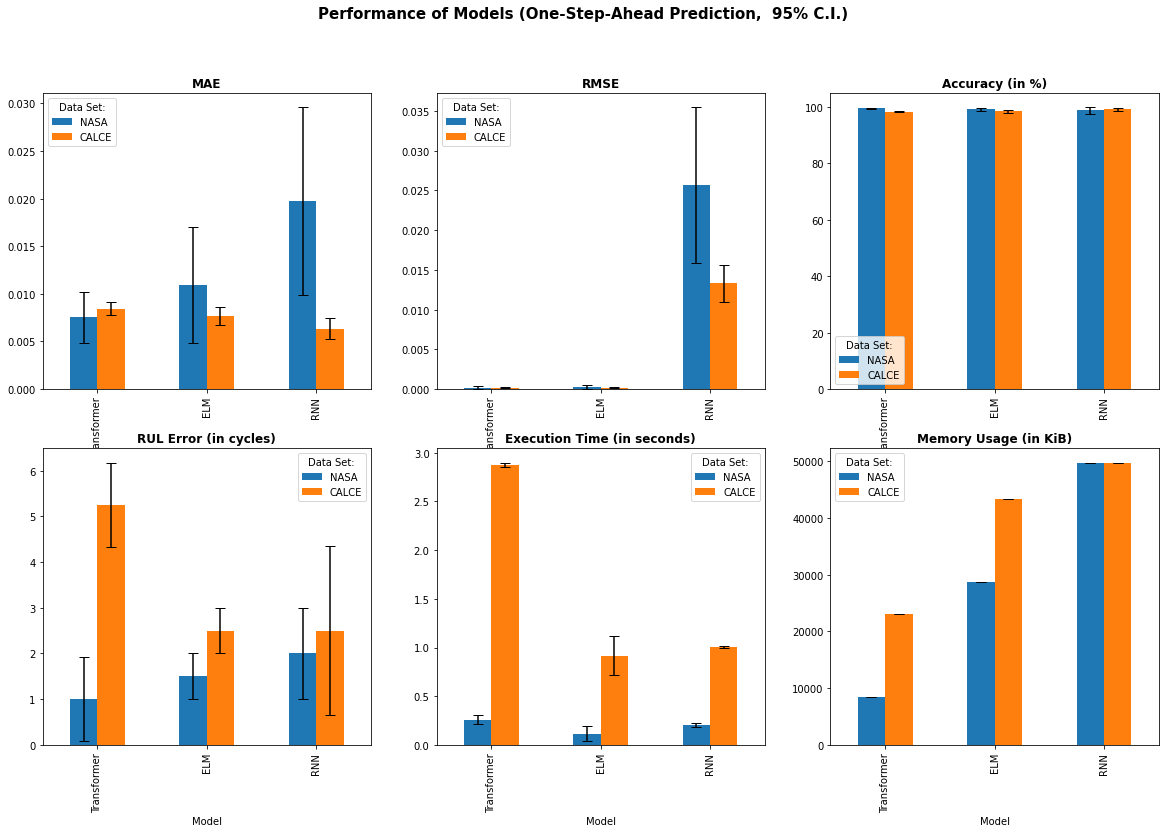

In [191]:
plt.figure(figsize=(20,12))

plt.suptitle('Performance of Models (One-Step-Ahead Prediction,  95% C.I.)', size=15, weight='bold')
df = OSP_NASA_Results
df2 = OSP_CALCE_Results

mae = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['mae'],
    "CALCE": OSP_CALCE_Results['mae']
})

mae_ci = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['mae_ci'],
    "CALCE": OSP_CALCE_Results['mae_ci']
})

rmse = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rmse'],
    "CALCE": OSP_CALCE_Results['rmse']
})

rmse_ci = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rmse_ci'],
    "CALCE": OSP_CALCE_Results['rmse_ci']
})

acc = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['acc'],
    "CALCE": OSP_CALCE_Results['acc']
})


mem = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['mem_usage'],
    "CALCE": OSP_CALCE_Results['mem_usage']
})

rulerror = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rul_error'],
    "CALCE": OSP_CALCE_Results['rul_error']
})

exectime = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['exec_time'],
    "CALCE": OSP_CALCE_Results['exec_time']
})

# MAE


#df.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="CALCE")
mae.set_index("model_name").plot.bar(ax=plt.subplot(2,3,1), yerr=mae_ci.set_index("model_name"),capsize = 5)
plt.title('MAE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RMSE

#df.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="CALCE")
rmse.set_index("model_name").plot.bar(ax=plt.subplot(2,3,2), yerr=rmse_ci.set_index("model_name"),capsize = 5)
plt.title('RMSE',weight='bold')
plt.xlabel("Test set")
plt.legend(title="Data Set:")

# Accuracy

#df.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="CALCE")
acc.set_index("model_name").plot.bar(ax=plt.subplot(2,3,3), yerr=[df['acc']-df['acc_p025'],df['acc_p975']-df['acc']],capsize = 5)
plt.title('Accuracy (in %)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RUL Error
rulerror.set_index("model_name").plot.bar(ax=plt.subplot(2,3,4), yerr=[df['rul_error']-df['rul_error_p025'],df['rul_error_p975']-df['rul_error']],capsize = 5)
plt.title('RUL Error (in cycles)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Execution Time
exectime.set_index("model_name").plot.bar(ax=plt.subplot(2,3,5), yerr=[df['exec_time']-df['exec_time_p025'],df['exec_time_p975']-df['exec_time']],capsize = 5)
plt.title('Execution Time (in seconds)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Memory usage
mem.set_index("model_name").plot.bar(ax=plt.subplot(2,3,6), yerr=[df['mem_usage']-df['mem_usage_p025'],df['mem_usage_p975']-df['mem_usage']],capsize = 5)
plt.title('Memory Usage (in KiB)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.savefig('Plots/Comparison_OSP.eps')

### Multi-Step Ahead

In [167]:
# NASA
MSP_NASA_Results = pd.DataFrame([
                    MSP_Transformer_NASA,
                    MSP_ELM_NASA,
                    MSP_LSTM_NASA
                  ])
MSP_NASA_Results

,model_name,mem_usage,mem_usage_p025,mem_usage_p975,exec_time,exec_time_p025,exec_time_p975,acc,acc_p025,acc_p975,mae,mae_p025,mae_p975,rmse,rmse_p025,rmse_p975,rul_error,rul_error_p025,rul_error_p975,RUL_relative_error
0,Transformer,8438.155762,8435.466870,8443.494263,0.431953,0.380881,0.468445,97.606919,96.085001,98.920250,0.032486,0.015777,0.050506,0.036220,0.020069,0.054995,12.75,9.075,16.000,0.494091
1,ELM,28639.571289,28639.286523,28639.676758,0.037974,0.030768,0.043704,97.065610,95.201516,98.406303,0.039186,0.022499,0.060100,0.045950,0.027388,0.072948,11.25,5.075,17.850,NaN
2,LSTM,19551.639404,19546.492578,19563.790845,0.215830,0.151241,0.376025,98.333041,97.483761,98.739205,0.023001,0.018220,0.035002,0.028906,0.022031,0.045254,4.00,3.075,4.925,0.313889


In [168]:
# CALCE
MSP_CALCE_Results = pd.DataFrame([
                    MSP_Transformer_CALCE,
                    MSP_ELM_CALCE,
                    MSP_LSTM_CALCE
                  ])
MSP_CALCE_Results

,model_name,mem_usage,mem_usage_p025,mem_usage_p975,exec_time,exec_time_p025,exec_time_p975,acc,acc_p025,acc_p975,mae,mae_p025,mae_p975,rmse,rmse_p025,rmse_p975,rul_error,rul_error_p025,rul_error_p975,RUL_relative_error
0,Transformer,23043.667969,23041.814063,23045.877148,3.290608,2.941608,3.782820,92.064067,86.507255,95.913302,0.038807,0.019909,0.063477,0.050364,0.026337,0.085168,21.25,6.300,47.675,0.145511
1,ELM,43349.535156,43348.974414,43349.976367,0.897111,0.839482,0.945105,89.449671,86.346861,93.009532,0.051927,0.032613,0.066355,0.062859,0.047614,0.077073,23.25,15.075,31.000,0.209954
2,LSTM,38404.591064,37125.940112,39683.473193,6.979197,6.500632,7.554358,92.171089,86.387148,95.962679,0.032624,0.020721,0.041540,0.043918,0.026190,0.060233,18.50,3.900,30.550,0.160166


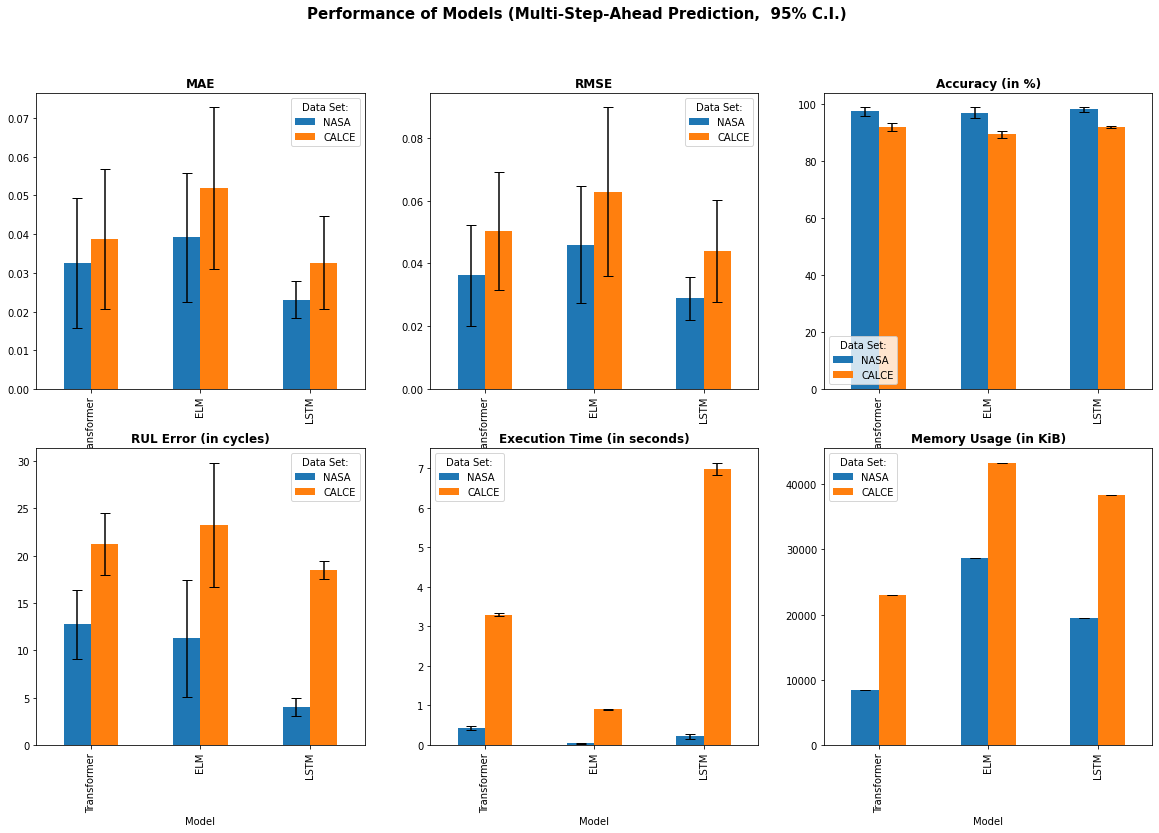

In [169]:
plt.figure(figsize=(20,12))

plt.suptitle('Performance of Models (Multi-Step-Ahead Prediction,  95% C.I.)', size=15, weight='bold')

df = MSP_NASA_Results
df2 = MSP_CALCE_Results

mae = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['mae'],
    "CALCE": MSP_CALCE_Results['mae']
})

rmse = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['rmse'],
    "CALCE": MSP_CALCE_Results['rmse']
})

acc = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['acc'],
    "CALCE": MSP_CALCE_Results['acc']
})

mem = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['mem_usage'],
    "CALCE": MSP_CALCE_Results['mem_usage']
})

rulerror = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['rul_error'],
    "CALCE": MSP_CALCE_Results['rul_error']
})

exectime = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['exec_time'],
    "CALCE": MSP_CALCE_Results['exec_time']
})

# MAE


#df.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="CALCE")
mae.set_index("model_name").plot.bar(ax=plt.subplot(2,3,1), yerr=[df['mae']-df['mae_p025'],df['mae_p975']-df['mae']],capsize = 5)
plt.title('MAE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RMSE

#df.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="CALCE")
rmse.set_index("model_name").plot.bar(ax=plt.subplot(2,3,2), yerr=[df['rmse']-df['rmse_p025'],df['rmse_p975']-df['rmse']],capsize = 5)
plt.title('RMSE',weight='bold')
plt.xlabel("Test set")
plt.legend(title="Data Set:")

# Accuracy

#df.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["acc"].plot(kind="line", grid=True, marker='o', label="CALCE")
acc.set_index("model_name").plot.bar(ax=plt.subplot(2,3,3), yerr=[df['acc']-df['acc_p025'],df['acc_p975']-df['acc']],capsize = 5)
plt.title('Accuracy (in %)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RUL Error
rulerror.set_index("model_name").plot.bar(ax=plt.subplot(2,3,4), yerr=[df['rul_error']-df['rul_error_p025'],df['rul_error_p975']-df['rul_error']],capsize = 5)
plt.title('RUL Error (in cycles)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Execution Time
exectime.set_index("model_name").plot.bar(ax=plt.subplot(2,3,5), yerr=[df['exec_time']-df['exec_time_p025'],df['exec_time_p975']-df['exec_time']],capsize = 5)
plt.title('Execution Time (in seconds)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Memory usage
mem.set_index("model_name").plot.bar(ax=plt.subplot(2,3,6), yerr=[df['mem_usage']-df['mem_usage_p025'],df['mem_usage_p975']-df['mem_usage']],capsize = 5)
plt.title('Memory Usage (in KiB)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.savefig('Plots/Comparison_MSP.eps')

## For Short Paper

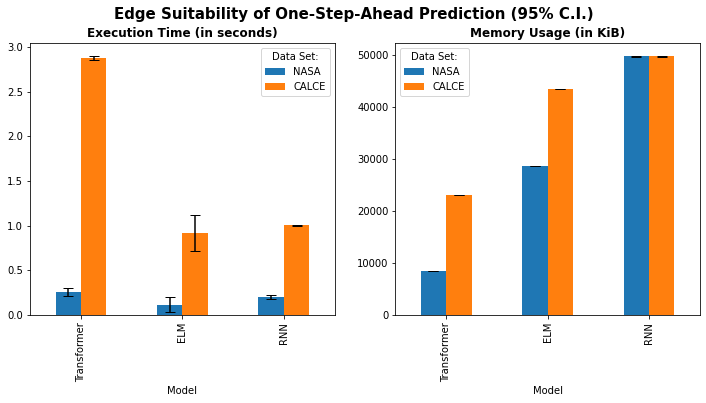

In [170]:
plt.figure(figsize=(12,5))

plt.suptitle('Edge Suitability of One-Step-Ahead Prediction (95% C.I.)', size=15, weight='bold')
df = OSP_NASA_Results
df2 = OSP_CALCE_Results

mem = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['mem_usage'],
    "CALCE": OSP_CALCE_Results['mem_usage']
})

rulerror = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rul_error'],
    "CALCE": OSP_CALCE_Results['rul_error']
})

exectime = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['exec_time'],
    "CALCE": OSP_CALCE_Results['exec_time']
})


# Execution Time
exectime.set_index("model_name").plot.bar(ax=plt.subplot(1,2,1), yerr=[df['exec_time']-df['exec_time_p025'],df['exec_time_p975']-df['exec_time']],capsize = 5)
plt.title('Execution Time (in seconds)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Memory usage
mem.set_index("model_name").plot.bar(ax=plt.subplot(1,2,2), yerr=[df['mem_usage']-df['mem_usage_p025'],df['mem_usage_p975']-df['mem_usage']],capsize = 5)
plt.title('Memory Usage (in KiB)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.savefig('Plots/Edge_OSP.eps')

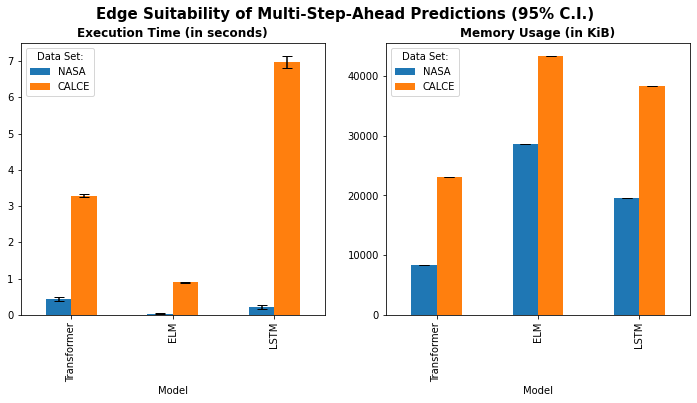

In [171]:
plt.figure(figsize=(12,5))

plt.suptitle('Edge Suitability of Multi-Step-Ahead Predictions (95% C.I.)', size=15, weight='bold')
df = MSP_NASA_Results
df2 = MSP_CALCE_Results

mem = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['mem_usage'],
    "CALCE": MSP_CALCE_Results['mem_usage']
})

rulerror = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['rul_error'],
    "CALCE": MSP_CALCE_Results['rul_error']
})

exectime = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['exec_time'],
    "CALCE": MSP_CALCE_Results['exec_time']
})

# Execution Time
exectime.set_index("model_name").plot.bar(ax=plt.subplot(1,2,1), yerr=[df['exec_time']-df['exec_time_p025'],df['exec_time_p975']-df['exec_time']],capsize = 5)
plt.title('Execution Time (in seconds)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# Memory usage
mem.set_index("model_name").plot.bar(ax=plt.subplot(1,2,2), yerr=[df['mem_usage']-df['mem_usage_p025'],df['mem_usage_p975']-df['mem_usage']],capsize = 5)
plt.title('Memory Usage (in KiB)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.savefig('Plots/Edge_MSP.eps')

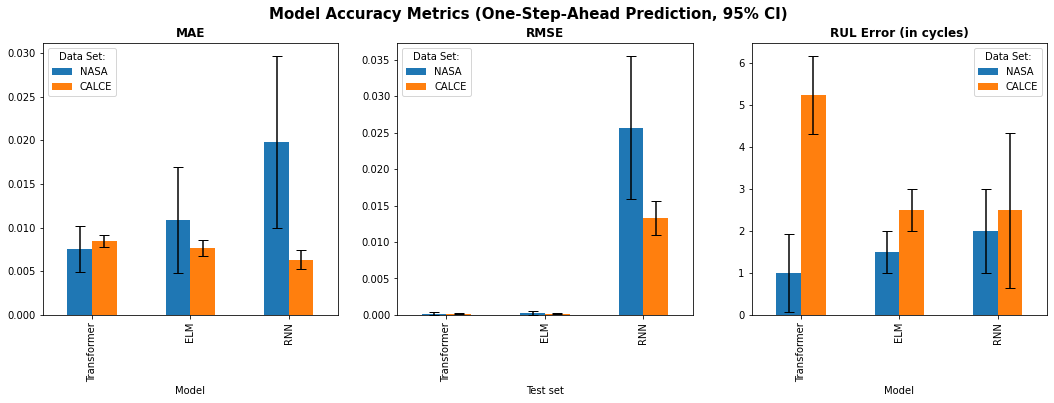

In [192]:
fig = plt.figure(figsize=(18,5))

df = OSP_NASA_Results
df2 = OSP_CALCE_Results

mae = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['mae'],
    "CALCE": OSP_CALCE_Results['mae']
})

rmse = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rmse'],
    "CALCE": OSP_CALCE_Results['rmse']
})


rulerror = pd.DataFrame({
    "model_name": OSP_NASA_Results['model_name'],
    "NASA": OSP_NASA_Results['rul_error'],
    "CALCE": OSP_CALCE_Results['rul_error']
})


# MAE


#df.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="CALCE")
mae.set_index("model_name").plot.bar(ax=plt.subplot(1,3,1), yerr=mae_ci.set_index("model_name"),capsize = 5)
plt.title('MAE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RMSE

#df.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="CALCE")
rmse.set_index("model_name").plot.bar(ax=plt.subplot(1,3,2), yerr=rmse_ci.set_index("model_name"),capsize = 5)
plt.title('RMSE',weight='bold')
plt.xlabel("Test set")
plt.legend(title="Data Set:")


# RUL Error
rulerror.set_index("model_name").plot.bar(ax=plt.subplot(1,3,3), yerr=[df['rul_error']-df['rul_error_p025'],df['rul_error_p975']-df['rul_error']],capsize = 5)
plt.title('RUL Error (in cycles)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

plt.suptitle('Model Accuracy Metrics (One-Step-Ahead Prediction, 95% CI)', size=15, weight='bold')

plt.savefig('Plots/Accuracy_OSP.eps')

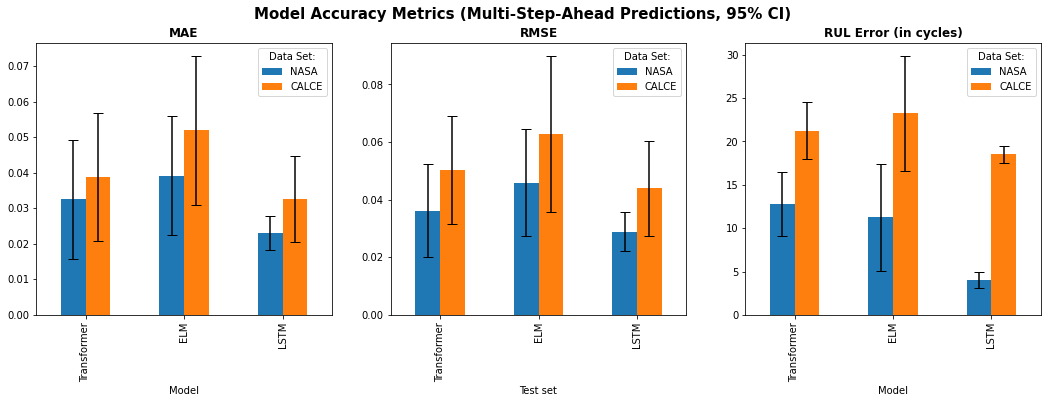

In [173]:
plt.figure(figsize=(18,5))

plt.suptitle('Model Accuracy Metrics (Multi-Step-Ahead Predictions, 95% CI)', size=15, weight='bold')
df = MSP_NASA_Results
df2 = MSP_CALCE_Results


mae = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['mae'],
    "CALCE": MSP_CALCE_Results['mae']
})

rmse = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['rmse'],
    "CALCE": MSP_CALCE_Results['rmse']
})


rulerror = pd.DataFrame({
    "model_name": MSP_NASA_Results['model_name'],
    "NASA": MSP_NASA_Results['rul_error'],
    "CALCE": MSP_CALCE_Results['rul_error']
})


# MAE

#df.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["mae"].plot(kind="line", grid=True, marker='o', label="CALCE")
mae.set_index("model_name").plot.bar(ax=plt.subplot(1,3,1), yerr=[df['mae']-df['mae_p025'],df['mae_p975']-df['mae']],capsize = 5)
plt.title('MAE',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")

# RMSE

#df.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="NASA")
#df2.set_index("model_name")["rmse"].plot(kind="line", grid=True, marker='o', label="CALCE")
rmse.set_index("model_name").plot.bar(ax=plt.subplot(1,3,2), yerr=[df['rmse']-df['rmse_p025'],df['rmse_p975']-df['rmse']],capsize = 5)
plt.title('RMSE',weight='bold')
plt.xlabel("Test set")
plt.legend(title="Data Set:")


# RUL Error
rulerror.set_index("model_name").plot.bar(ax=plt.subplot(1,3,3), yerr=[df['rul_error']-df['rul_error_p025'],df['rul_error_p975']-df['rul_error']],capsize = 5)
plt.title('RUL Error (in cycles)',weight='bold')
plt.xlabel("Model")
plt.legend(title="Data Set:")



plt.savefig('Plots/Accuracy_MSP.eps')